In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import plotly.graph_objects as go

pd.options.mode.chained_assignment = None # Pretty sure this will come back to stab me in the back
%config InlineBackend.figure_format = 'retina' # Higher quality images for slides

githubrepo = 'https://raw.githubusercontent.com/joedav98/SC1015_SC18_SpotifyRepo/main/data/'

In [2]:
def converttonumeric(final):
  final.danceability = pd.to_numeric(final.danceability)
  final.energy = pd.to_numeric(final.energy)
  final.loudness = pd.to_numeric(final.loudness)
  final.speechiness = pd.to_numeric(final.speechiness)
  final.acousticness = pd.to_numeric(final.acousticness)
  final.liveness = pd.to_numeric(final.liveness)
  final.valence = pd.to_numeric(final.valence)
  final.tempo = pd.to_numeric(final.tempo)
  final.duration_ms = pd.to_numeric(final.duration_ms)
  final.year = pd.to_numeric(final.year)
# Function to convert all values to numeric

def convertKeytoCat(df):
  df['key'] = df['key'].replace({
      0 : 'C', 
      1 : 'C#/Db', 
      2 : 'D', 
      3 : 'D#/Eb', 
      4 : 'E', 
      5 : 'F', 
      6 : 'F#/Gb', 
      7 : 'G', 
      8 : 'G#/Ab', 
      9 : 'A', 
      10 : 'A#/Bb', 
      11 : 'B'})
# Convert key from numbers to letters
  
def convertKeytoNum(df):
  drop20s['key'] = drop20s['key'].str[0].map({
      'C' : 0, 
      'C#/Db' : 1, 
      'D' : 2, 
      'D#/Eb' : 3, 
      'E' : 4, 
      'F' : 5, 
      'F#/Gb' : 6, 
      'G' : 7, 
      'G#/Ab' : 8, 
      'A' : 9, 
      'A#/Bb' : 10, 
      'B' : 11})
# Encode key

In [3]:
nonhit0 = pd.read_csv(githubrepo + 'spotify_tracks_metadata_0.csv')
nonhit1 = pd.read_csv(githubrepo + 'spotify_tracks_metadata_1.csv')
nonhit2 = pd.read_csv(githubrepo + 'spotify_tracks_metadata_2.csv')
nonhit3 = pd.read_csv(githubrepo + 'spotify_tracks_metadata_3.csv')
nonhit4 = pd.read_csv(githubrepo + 'spotify_tracks_metadata_4.csv')
nonhit5 = pd.read_csv(githubrepo + 'spotify_tracks_metadata_5.csv')
nonhit6 = pd.read_csv(githubrepo + 'spotify_tracks_metadata_6.csv')


nonhit1 = pd.DataFrame(data = nonhit1.values, columns = nonhit0.columns)
nonhit2 = pd.DataFrame(data = nonhit2.values, columns = nonhit0.columns)
nonhit3 = pd.DataFrame(data = nonhit3.values, columns = nonhit0.columns)
nonhit4 = pd.DataFrame(data = nonhit4.values, columns = nonhit0.columns)
nonhit5 = pd.DataFrame(data = nonhit5.values, columns = nonhit0.columns)
nonhit6 = pd.DataFrame(data = nonhit6.values, columns = nonhit0.columns)


nonhitmerge = pd.concat([nonhit0, nonhit1, nonhit2, nonhit3, nonhit4, nonhit5, nonhit6], ignore_index = True).sort_values(by = ['album_release_year'])

nonhitpre = nonhitmerge.drop(labels = ['Unnamed: 0',
                                        'spotify_id',
                                        'album_release_date',
                                        'album_release_month',
                                        'analysis_url',
                                        'mode',
                                        'song_explicit',
                                        'time_signature',
                                        'total_available_markets',
                                        'track_href',
                                        'uri',
                                        'instrumentalness'],
                      axis = 1,
                      inplace = False)

nonhitpre.rename(columns = {'song_name':'track',
                            'artist_name':'artist',
                            'album_release_year':'year'},
               inplace = True) # Renaming columns to merge with larger dataset

nonhitprocess = nonhitpre[nonhitpre.song_popularity <= 50].dropna() # Using popularity feature to avoid hit songs
nonhitprocess = nonhitprocess.drop(labels = ['song_popularity'], axis = 1, inplace = False)

decade90nonhitpre = nonhitprocess[(nonhitprocess.year >= 1990) & (nonhitprocess.year <= 1999)].sort_values(by = ['year'])
decade00nonhitpre = nonhitprocess[(nonhitprocess.year >= 2000) & (nonhitprocess.year <= 2009)].sort_values(by = ['year'])
decade10nonhitpre1 = nonhitprocess[(nonhitprocess.year >= 2010) & (nonhitprocess.year <= 2018)].sort_values(by = ['year'])
decade10nonhitpre2 = nonhitprocess[(nonhitprocess.year == 2019)].sort_values(by = ['year'])
decade10nonhitpre3 = nonhitprocess[(nonhitprocess.year == 2020)].sort_values(by = ['year'])
decade10nonhitpre4 = nonhitprocess[(nonhitprocess.year == 2021)].sort_values(by = ['year'])

decade90nonhit = decade90nonhitpre.sample(n = 2700, random_state = 52)
decade00nonhit = decade00nonhitpre.sample(n = 2830, random_state = 52)
decade10nonhit1 = decade10nonhitpre1.sample(n = 2570, random_state = 52)
decade10nonhit2 = decade10nonhitpre2.sample(n = 480, random_state = 52)
decade10nonhit3 = decade10nonhitpre3.sample(n = 450, random_state = 52)
decade10nonhit4 = decade10nonhitpre4.sample(n = 500, random_state = 52)

decade10nonhit = pd.concat([decade10nonhit1, decade10nonhit2, decade10nonhit3, decade10nonhit4], join = 'inner')

for nonhit in [decade90nonhit, decade00nonhit, decade10nonhit]:
  nonhit['charted'] = False
  nonhit['weeks-on-board'] = 0
  converttonumeric(nonhit)
  convertKeytoCat(nonhit)

In [4]:
data20s = pd.read_csv(githubrepo + 'dataset-of-20s.csv')
data20s = data20s[data20s['Highest Charting Position'] <= 100] # Getting only top 100, instead of top 200
drop20s = data20s.drop(labels = ['Index',
                                 'Highest Charting Position',
                                 'Week of Highest Charting',
                                 'Streams',
                                 'Artist Followers',
                                 'Song ID',
                                 'Genre',
                                 'Popularity',
                                 'Release Date'],
                       axis = 1,
                       inplace = False) # Dataset of hit songs from 2019 to 2021

drop20s['Weeks Charted'] = drop20s['Weeks Charted'].str[:4] # Extracting year of charting from weeks charted

drop20s.rename(columns = {'Number of Times Charted':'weeks-on-board',
                          'Song Name':'track',
                          'Artist':'artist',
                          'Weeks Charted':'year',
                          'Danceability':'danceability',
                          'Energy':'energy',
                          'Loudness':'loudness',
                          'Speechiness':'speechiness',
                          'Acousticness':'acousticness',
                          'Liveness':'liveness',
                          'Tempo':'tempo',
                          'Duration (ms)':'duration_ms',
                          'Valence':'valence',
                          'Chord':'key'},
               inplace = True) # Renaming columns to merge with larger dataset

drop20s = drop20s.replace(r'^\s*$', np.nan, regex=True)
drop20s.dropna(subset=['danceability'], inplace=True)


In [5]:
print(f"Decade 90 NonHits: {len(decade90nonhit.index)}")
print(f"Decade 00 NonHits: {len(decade00nonhit.index)}")
print(f"Decade 10 NonHits: {len(decade10nonhit.index)}")

Decade 90 NonHits: 2700
Decade 00 NonHits: 2830
Decade 10 NonHits: 4000


In [6]:
# Data is uploaded to a github repo, in order to pull when we need
data90s = pd.read_csv(githubrepo + 'dataset-of-90s.csv')
data00s = pd.read_csv(githubrepo + 'dataset-of-00s.csv')
data10s = pd.read_csv(githubrepo + 'dataset-of-10s.csv')
charts = pd.read_csv(githubrepo + 'charts.csv').drop_duplicates(subset=['song', 'artist'], keep = 'first') 
# Dataset from Billboard, drop duplicates leaves only the latest occurence of a hit song

datayears = [data90s, data00s, data10s] # Dataset of top tracks from 1960s to 2010s, with Echonest info
reference = pd.concat(datayears, ignore_index = True).drop_duplicates(subset = ['track', 'artist'], keep = 'last') # Leaves only latest occurence of a hit song
charts['date'] = charts['date'].str[:-6]

dropref = reference.drop(labels = ['uri', 
                                   'mode',
                                   'chorus_hit',
                                   'sections',
                                   'target',
                                   'instrumentalness',
                                   'time_signature'], 
                        axis = 1, 
                        inplace = False) # Dropping features that won't be helpful in analysis

dropcharts = charts.drop(labels = ['rank', 
                                   'last-week',
                                   'peak-rank'],
                         axis = 1,
                         inplace = False).reset_index(drop = True) # Dropping features that won't be helpful in analysis
# Rank and peak rank can change in a single year, last week is redundant as we are using the year it charted

mergedDF = pd.merge(dropref, dropcharts, left_on = ['track', 'artist'], right_on = ['song', 'artist']) # Merging Spotify data with Billboard data

mergedDF = mergedDF.drop(labels = ['song'], axis = 1, inplace = False)
mergedDF.rename(columns = {'date':'year'}, inplace = True)

mergedDF.year = pd.to_numeric(mergedDF.year)

decade90hit = mergedDF[(mergedDF.year >= 1990) & (mergedDF.year <= 1999)]
decade00hit = mergedDF[(mergedDF.year >= 2000) & (mergedDF.year <= 2009)]
decade10hit = mergedDF[(mergedDF.year >= 2010) & (mergedDF.year <= 2021)]

decade10hit = pd.concat([decade10hit, drop20s], join = 'outer').drop_duplicates(subset = ['track', 'artist'], keep = 'last') # Joining the merged dataset with the dataset from 2019 to 2021, defaulting to merged dataset for clashes

hits = [decade90hit, decade00hit, decade10hit]
for hit in hits:
  hit['charted'] = True
  converttonumeric(hit)
  convertKeytoCat(hit)

In [7]:
print(f"Decade 90 Hits: {len(decade90hit.index)}")
print(f"Decade 00 Hits: {len(decade00hit.index)}")
print(f"Decade 10 Hits: {len(decade10hit.index)}")

Decade 90 Hits: 2673
Decade 00 Hits: 2831
Decade 10 Hits: 4065


Decade 90s: 5373
Decade 00s: 5661
Decade 10s: 8065


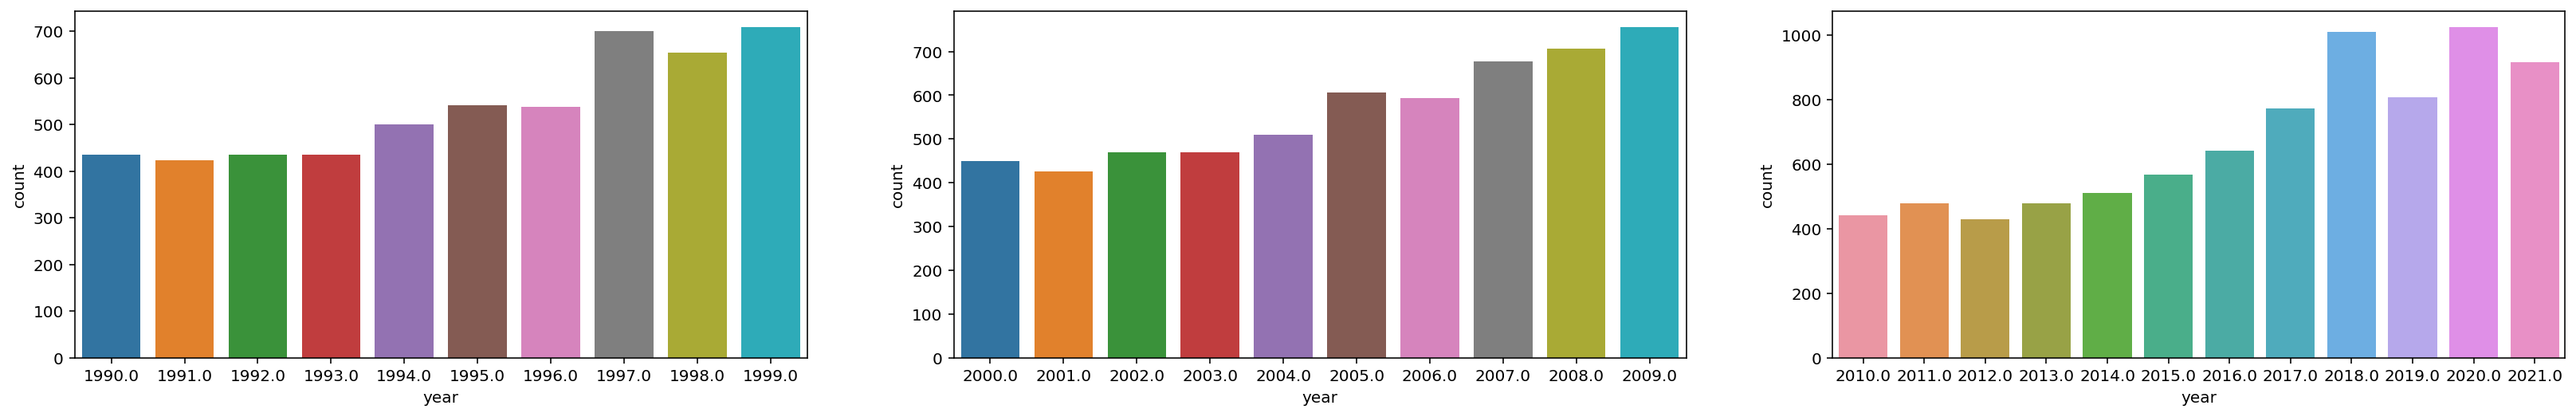

In [8]:
decade90 = pd.concat([decade90hit, decade90nonhit], join = 'inner').reset_index(drop = True)
decade00 = pd.concat([decade00hit, decade00nonhit], join = 'inner').reset_index(drop = True)
decade10 = pd.concat([decade10hit, decade10nonhit], join = 'inner').reset_index(drop = True)

decadeHits = pd.concat([decade90hit,decade00hit,decade10hit], join = 'inner').reset_index(drop = True)
decadeNonHits = pd.concat([decade90nonhit,decade00nonhit,decade10nonhit], join = 'inner').reset_index(drop = True)

final = pd.concat([decadeHits,decadeNonHits], join = 'inner').reset_index(drop = True)

decades = [decade90, decade00, decade10]

for decade in decades:
  decade.sort_values(by = ['year', 'weeks-on-board']).reset_index(drop = True) # Sorting by year then by weeks-on-board, resetting index as a final preparation of the dataset

print(f"Decade 90s: {len(decade90.index)}")
print(f"Decade 00s: {len(decade00.index)}")
print(f"Decade 10s: {len(decade10.index)}")


f, axes = plt.subplots(1, 3, figsize=(28, 4))
ax = sb.countplot(x = 'year', data = decade90, ax = axes[0])
ax = sb.countplot(x = 'year', data = decade00, ax = axes[1])
ax = sb.countplot(x = 'year', data = decade10, ax = axes[2])

In [12]:
decade90.to_csv('output/decade90.csv', index = False)
decade00.to_csv('output/decade00.csv', index = False)
decade10.to_csv('output/decade10.csv', index = False)